# Insurance Claim Fraud Detection

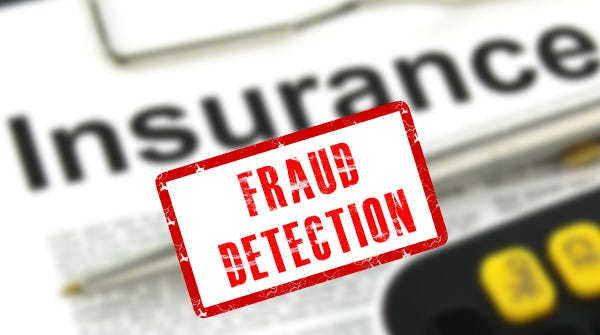

### Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


### Independent Variables

##### Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv



# Importing necessary libraries

In [101]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Uploading and reading the dataset

In [102]:
claim=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

# Lets check the first five rows of our dataset.

In [103]:
claim.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

# Lets check the last five rows of our dataset.

In [104]:
claim.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

# Lets check the shape of our dataset

In [105]:
claim.shape

(1000, 40)

Our dataset has 1000 rows and 40 columns.

In [106]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

claim dataset has 21 categorical columns and 19 numerical columns. In numerical columns values is in integer and float form.

# Lets check the duplicate values 

In [107]:
claim.duplicated().sum()

0

###### Great, no duplicate values in our claim dataset.

# Converting Date columns and Extracting Day, Month and Year

In [108]:
claim['policy_bind_date']=pd.to_datetime(claim['policy_bind_date'])
claim['incident_date']=pd.to_datetime(claim['incident_date'])

In [109]:
claim['policy_bind_day'] = claim['policy_bind_date'].dt.day
claim['policy_bind_month'] = claim['policy_bind_date'].dt.month
claim['policy_bind_year'] = claim['policy_bind_date'].dt.year


claim['incident_day'] = claim['incident_date'].dt.day
claim['incident_month'] = claim['incident_date'].dt.month
claim['incident_year'] = claim['incident_date'].dt.year

# Drop policy_bind_date and incident_date columns
claim.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

# Let check if any whitespace, 'NA' or '-' exist in dataset

In [110]:
claim.isin(['','NA','-','?','NaN']).sum().sort_values(ascending=0)

property_damage                360
police_report_available        343
collision_type                 178
months_as_customer               0
incident_hour_of_the_day         0
bodily_injuries                  0
witnesses                        0
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_make                        0
auto_model                       0
auto_year                        0
fraud_reported                   0
_c39                             0
policy_bind_day                  0
policy_bind_month                0
policy_bind_year                 0
incident_day                     0
incident_month                   0
number_of_vehicles_involved      0
incident_location                0
age                              0
insured_education_level          0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable   

In [111]:
claim.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                   

We have three columns,in which we have missing value "?".

###### All the missing values from the categorical columns. we will use the mode method to handle the missing values.

## Lets check the unique values and values counts in our dataset

In [112]:
claim['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [113]:
claim['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [114]:
claim['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [115]:
claim['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [116]:
claim['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [117]:
claim['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [118]:
claim.nunique().sort_values(ascending=0)

incident_location              1000
policy_number                  1000
insured_zip                     995
policy_annual_premium           991
total_claim_amount              763
vehicle_claim                   726
injury_claim                    638
property_claim                  626
months_as_customer              391
capital-loss                    354
capital-gains                   338
age                              46
auto_model                       39
policy_bind_day                  31
policy_bind_year                 26
incident_hour_of_the_day         24
incident_day                     22
auto_year                        21
insured_hobbies                  20
auto_make                        14
insured_occupation               14
policy_bind_month                12
incident_month                   12
umbrella_limit                   11
incident_city                     7
incident_state                    7
insured_education_level           7
insured_relationship        

## Lets impute"?" in out categorical columns

In [119]:
claim.replace('?',np.NaN,inplace=True)


## Lets handle the missing values from the dataset.

In [120]:
claim['collision_type'] = claim['collision_type'].fillna(claim['collision_type'].mode()[0])

In [121]:
claim['police_report_available']=claim['police_report_available'].fillna(claim['police_report_available'].mode()[0])

In [122]:
claim['property_damage']=claim['property_damage'].fillna(claim['property_damage'].mode()[0])

In [123]:
claim.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                   

## Lets remove the irrelvant columns from our data set.

In [124]:
claim.drop(['policy_number'],axis=1,inplace=True)

In [125]:
claim.drop(['_c39'],axis=1,inplace=True)

In [126]:
claim.drop(['incident_location'],axis=1,inplace=True)

In [127]:
claim.drop(['insured_zip'],axis=1,inplace=True)

In [128]:
claim.drop(['incident_year'],axis=1,inplace=True)

1-We have removed '_c39'column has all null values.


2-Policy_number has all unique values. No impact on our prediction.

3-incident_year have 1 value for total dataset. Let's drop it.

###### Now no missing values is in our dataset.

## Checking values of Target Variable

In [129]:
claim['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

# Extract Age

In [130]:
claim['Automobile_Age']=2015 - claim['auto_year']

claim.drop("auto_year",axis=1,inplace=True)

# Checking missing value through heatmap

<AxesSubplot:>

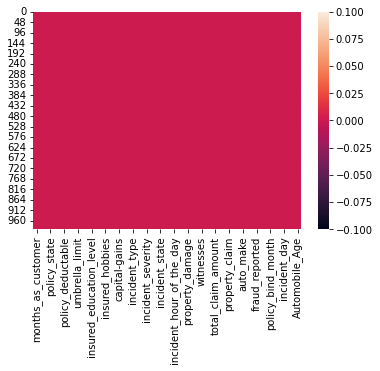

In [131]:
sns.heatmap(claim.isnull())

###### Heatmap also reflects no missing values in our dataset.

# Descriptive Statistics

In [132]:
claim.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

       ...  total_claim_amount  injury_claim  property_claim  vehicle_claim  \
count  ...          1000.00000   1000.000000     1000.000000    1000.000000   
mean   ...         52761.94000   7433.420000     7399.570000   37928.950000   
std    ...         26401.53319   4880.951853     4824.726179   18886.252893   
min    ...           100.00000      0.000000        0.000000      70.000000   
25%    ...         41812.50000   4295.000000     4445.000000   30292.500000   
50%    ...         58055.00000   6775.000000     6750.000000   42100.000000   
75%    ...         70592.50000  11305.000000    10885.000000   50822.500000   
max    ...        114920.00000  21450.000000    23670.000000   79560.000000   

       policy_bind_day  policy_bind_month  policy_bind_year  incident_day  \
count      1000.000000        1000.000000       1000.000000    1000.00000   
mean         15.448000           6.559000       2001.604000      13.08400   
std           8.850176           3.391758          7.360391      10.44318   
min           1.000000           1.000000       1990.000000       1.00000   
25%           8.000000           4.000000       1995.000000       2.00000   
50%          16.000000           7.000000       2002.000000      15.00000   
75%          23.000000           9.000000       2008.000000      22.00000   
max          31.000000          12.000000       2015.000000      31.00000   

       incident_month  Automobile_Age  
count     1000.000000     1000.000000  
mean         3.407000        9.897000  
std          3.276291        6.015861  
min          1.000000        0.000000  
25%          1.000000        5.000000  
50%          2.000000       10.000000  
75%          5.000000       15.000000  
max         12.000000       20.000000  

[8 rows x 21 columns]

# Explore policy_csl


In [133]:
claim['policy_csl'].sample(n=6)

561     250/500
856    500/1000
814    500/1000
673    500/1000
959    500/1000
835    500/1000
Name: policy_csl, dtype: object

As per wikipedia, if the liability coverage on auto policy is written as a combined single limit (CSL), there is no differentiation between bodily injury payouts per person, per accident, or property damage claims.

Here policy_csl have two numerical data separated by '/', resulting into object datatype.

Let's split this column into two CSL columns.

In [134]:
claim['csl_1st_part']= claim.policy_csl.str.split('/',expand=True)[0]
claim['csl_2nd_part']= claim.policy_csl.str.split('/',expand=True)[1]

# Drop policy_csl column 
claim.drop("policy_csl",axis=1,inplace=True)

## Changing datatype

In [135]:
claim[['csl_1st_part', 'csl_2nd_part']]= claim[['csl_1st_part', 'csl_2nd_part']].astype(int)

## Differentiate Numarical and Categorical Data

In [136]:
claim.columns.to_series().groupby(claim.dtypes).groups

{int32: ['csl_1st_part', 'csl_2nd_part'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Exploratory Data Analysis(EDA)

## Categorical Data Analysis

In [137]:
cat_features= ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 
               'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 
               'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
               'property_damage', 'police_report_available', 'auto_make', 'auto_model']
for i in cat_features:
    x= claim[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("="*20)

Value counts of policy_state is---
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
Value counts of insured_sex is---
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
Value counts of insured_education_level is---
 JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
Value counts of insured_occupation is---
 machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
Value counts of insured_hobbies is---
 reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55


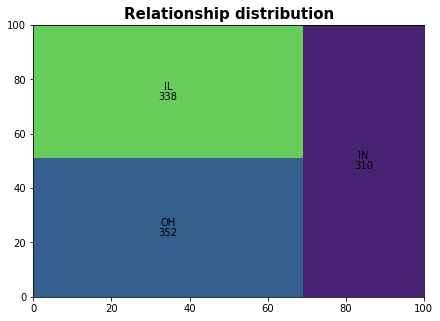

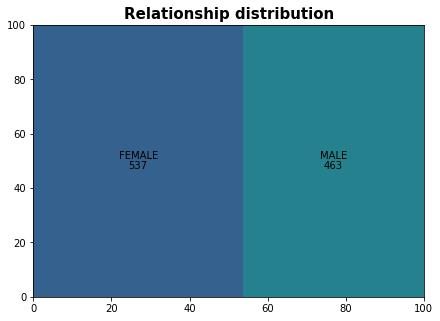

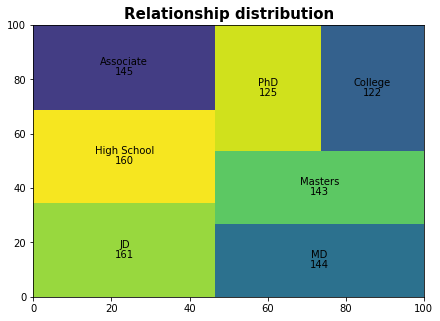

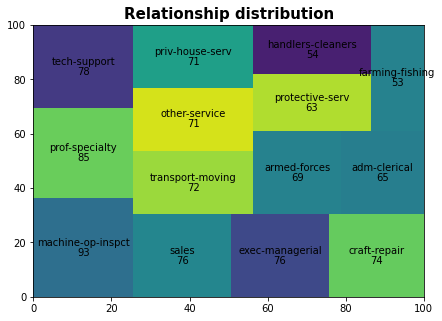

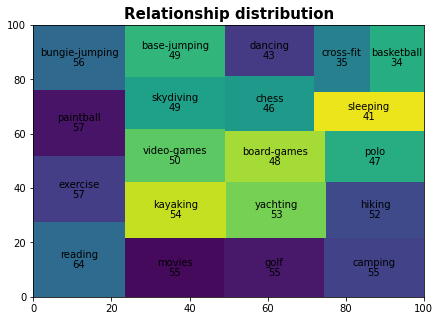

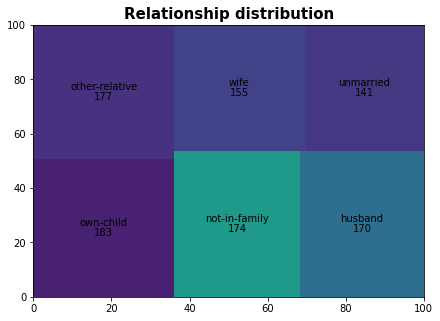

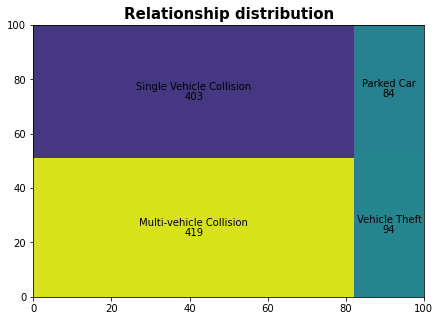

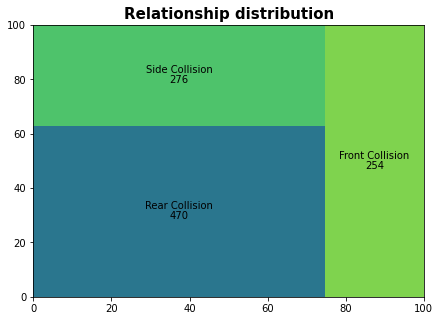

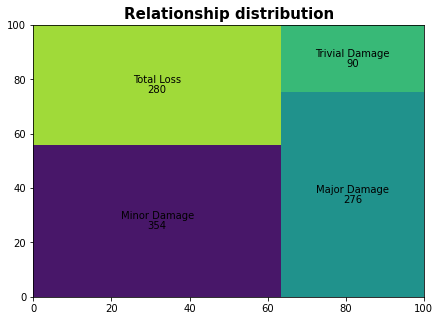

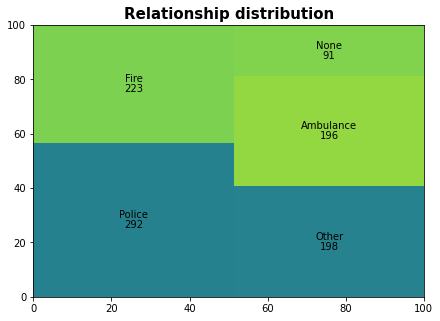

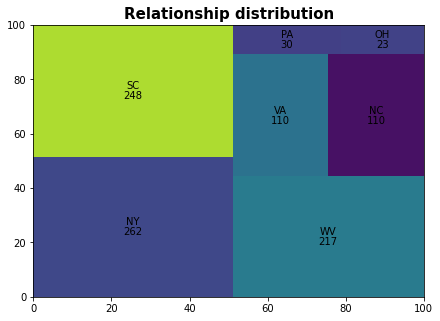

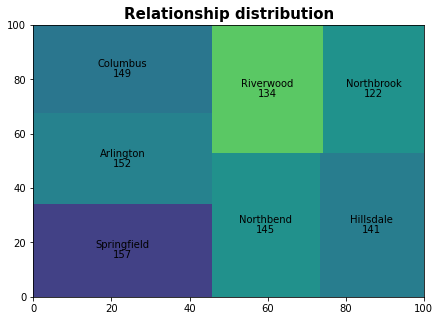

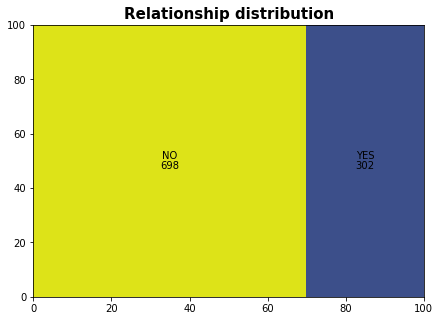

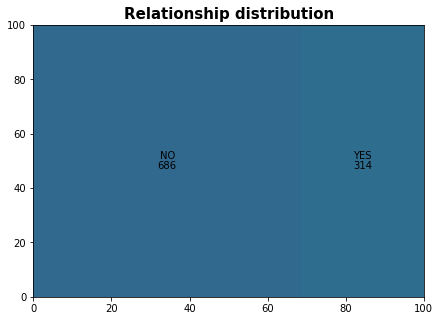

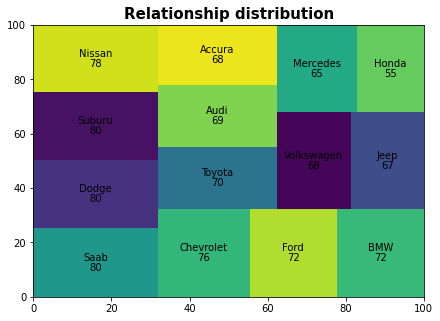

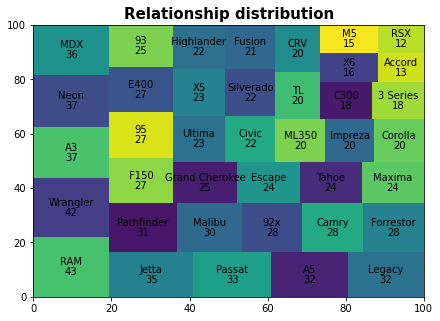

In [138]:
import squarify
for i in cat_features:
    plt.figure(figsize=(7, 5))
    reln = claim[i].value_counts()
    squarify.plot(sizes=reln.values, value=reln.values, label=reln.index)
    plt.title('Relationship distribution', fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

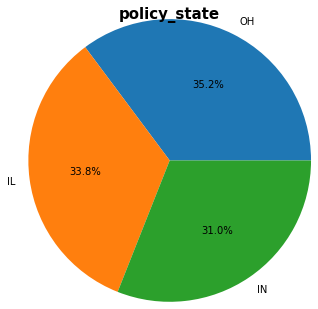

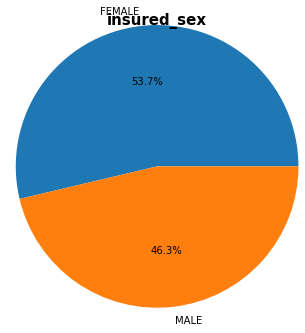

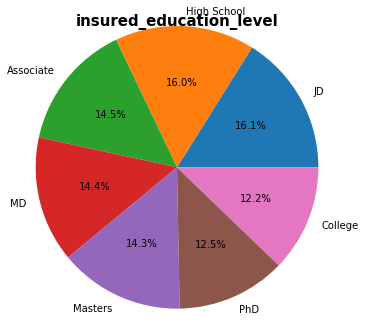

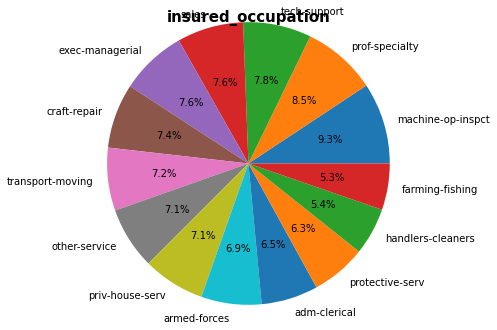

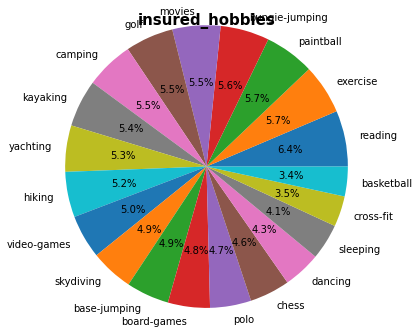

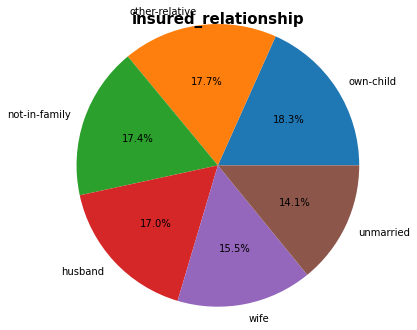

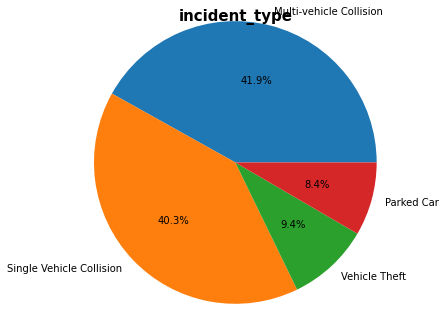

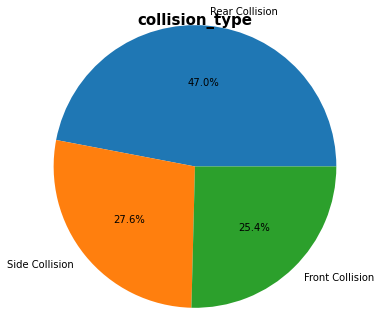

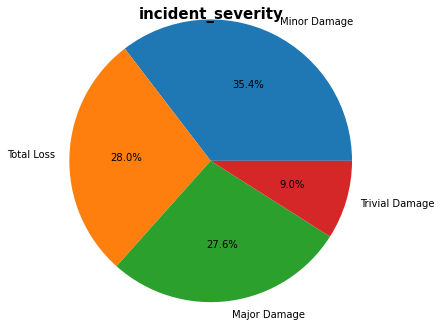

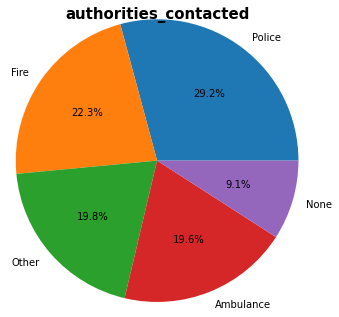

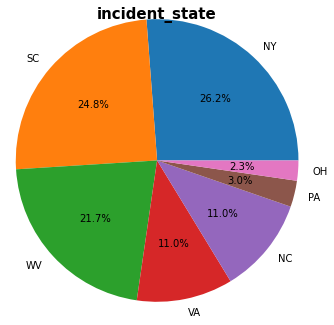

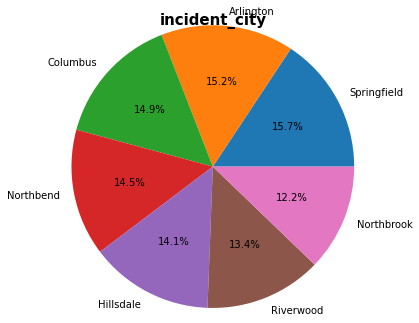

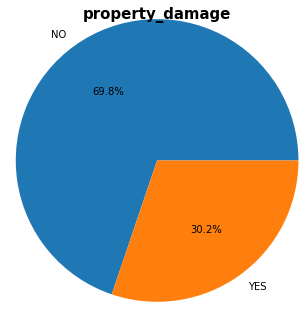

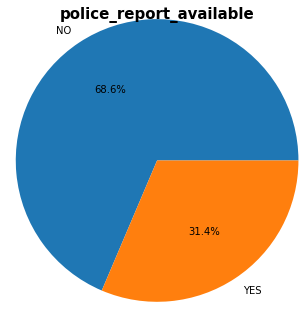

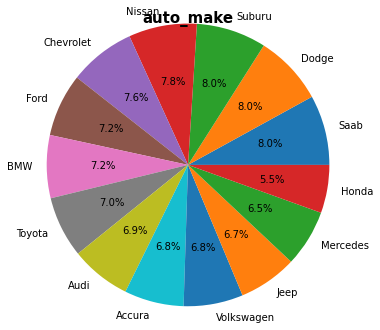

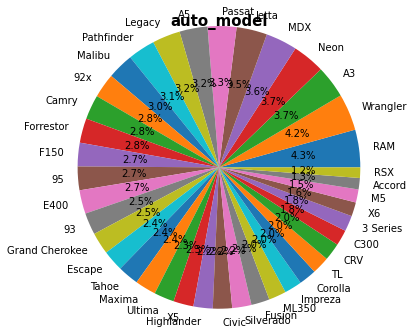

In [139]:
for i in cat_features:
    plt.figure(figsize=(5,5))
    claim[i].value_counts().plot.pie(radius =1.3, textprops ={ 'fontsize':10}, autopct='%2.1f%%')
    plt.title(i,fontsize =15,fontweight ='bold')
    plt.ylabel(' ')
    plt.show()

# Analysis of Numarical variable

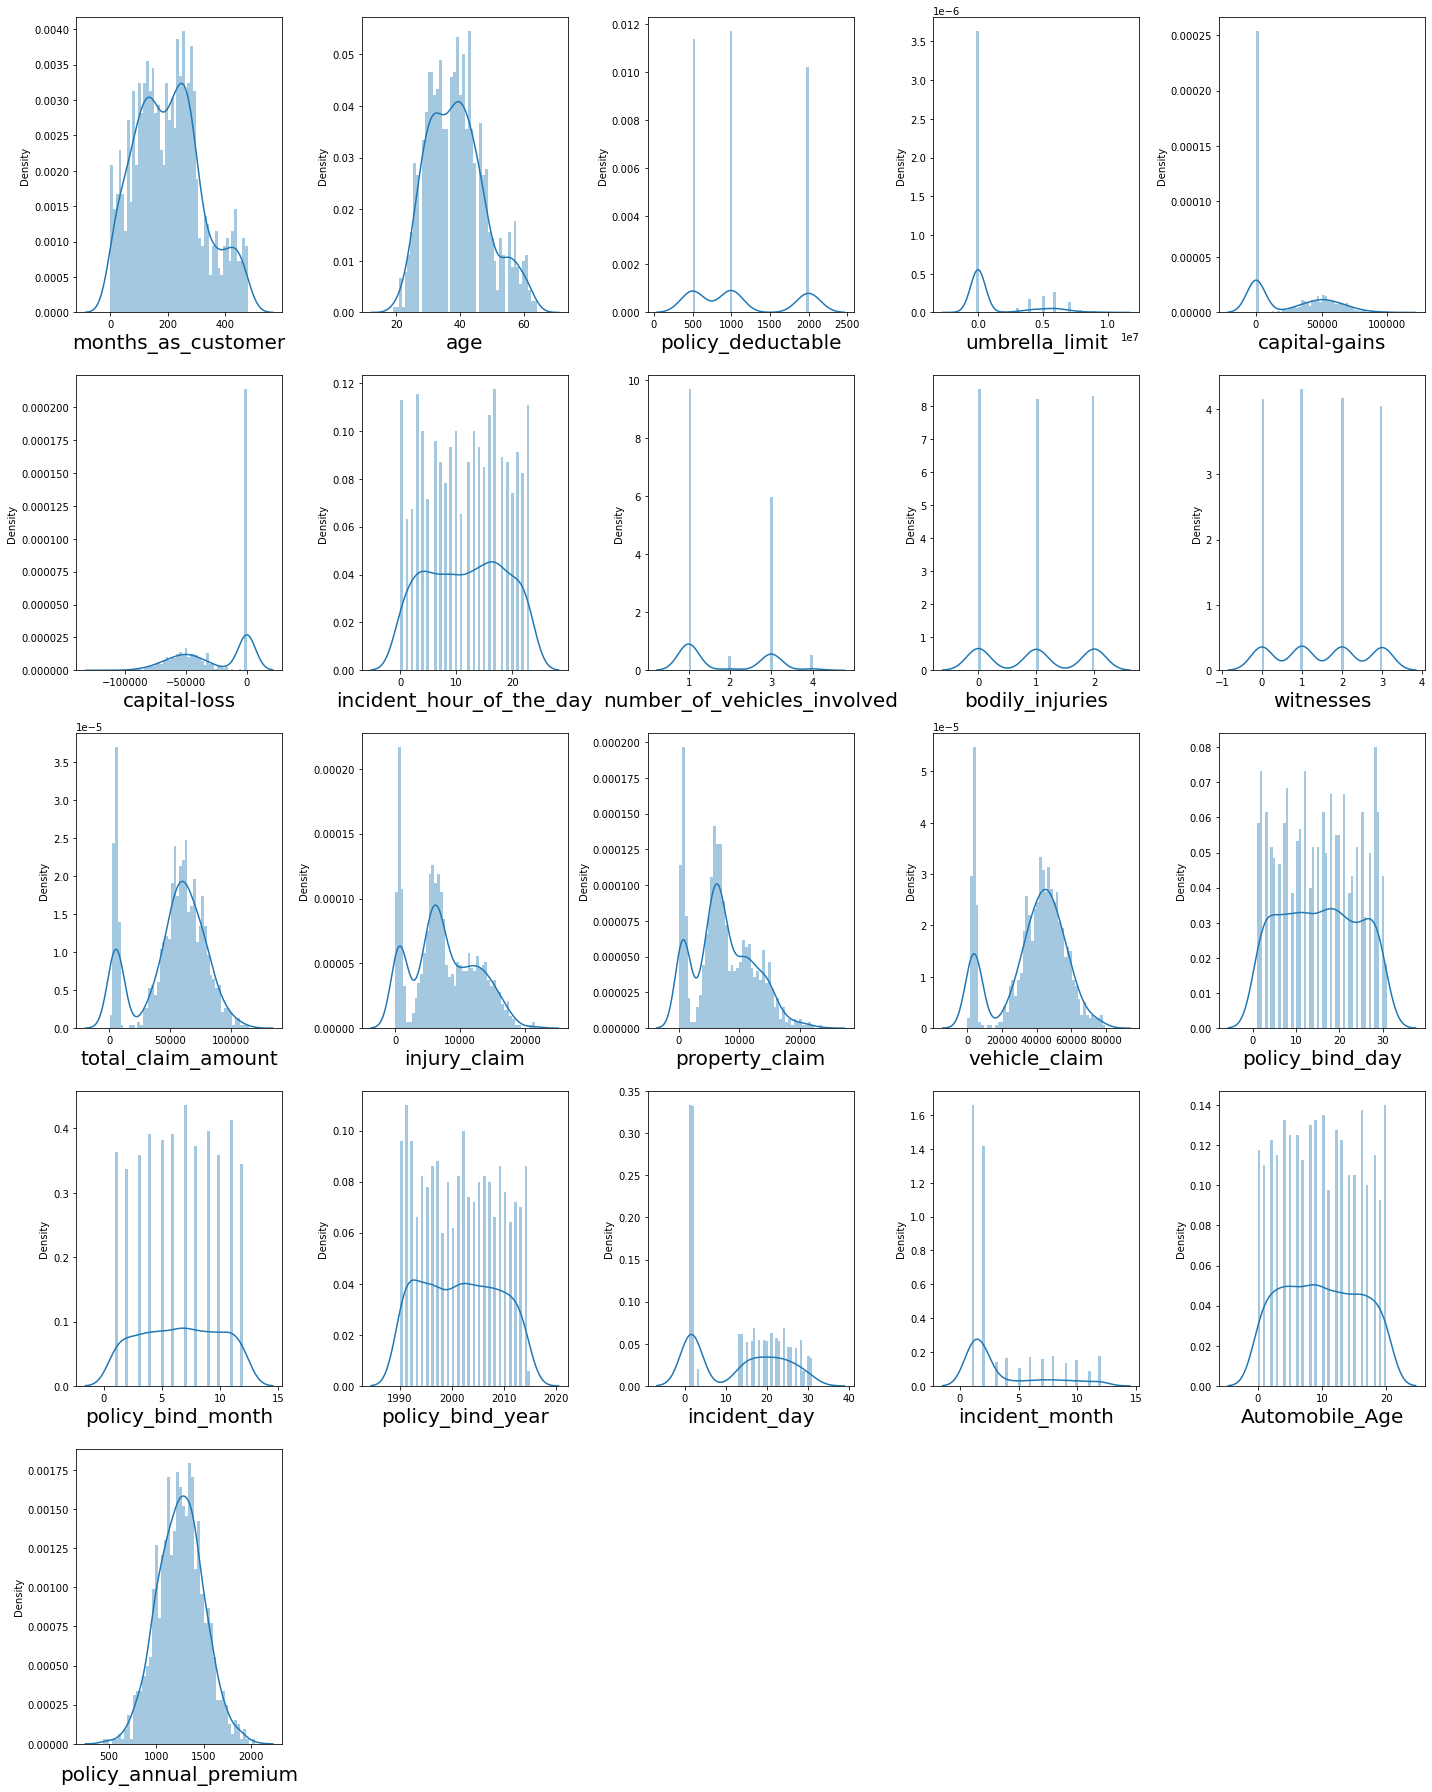

In [140]:
num_features= ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains',
              'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 
              'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 
              'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age', 'policy_annual_premium']

i=0
plt.figure(figsize=(20,25))
for p in num_features:
    plt.subplot(5,5,i+1)
    sns.distplot(claim[p], bins=50)
    plt.xlabel(p,fontsize=20)
    i+=1  
plt.tight_layout()

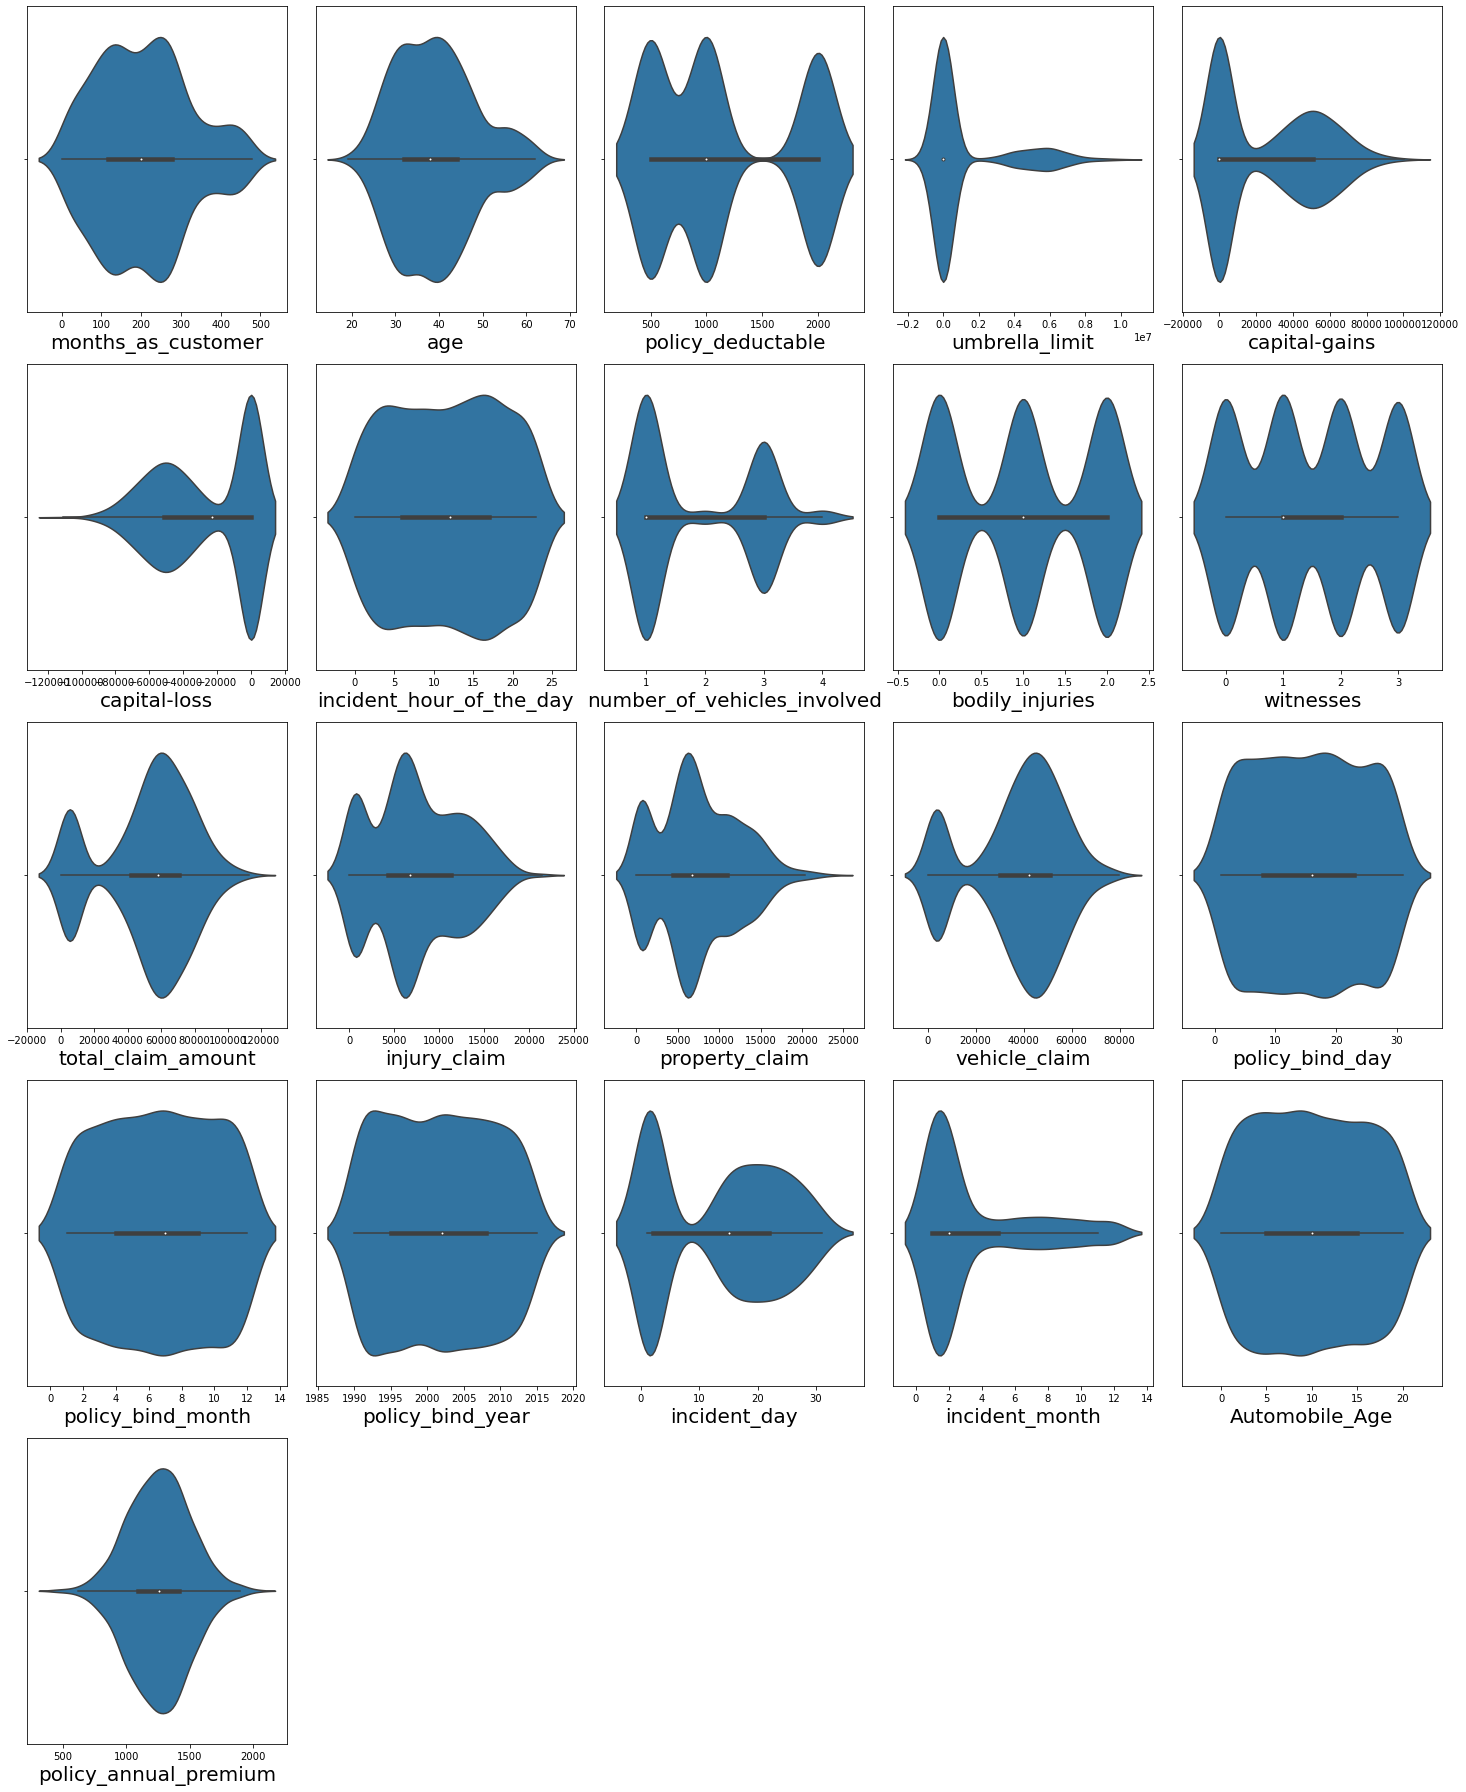

In [141]:
i=0
plt.figure(figsize=(20,25))
for p in num_features:
    plt.subplot(5,5,i+1)
    sns.violinplot(claim[p])
    plt.xlabel(p,fontsize=20)
    i+=1 
plt.tight_layout()
plt.show()

# Target variable analysis

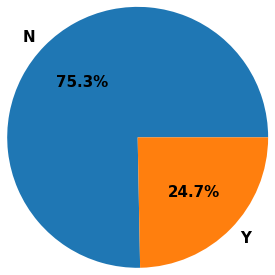

In [142]:
claim['fraud_reported'].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.ylabel(' ')
plt.show()

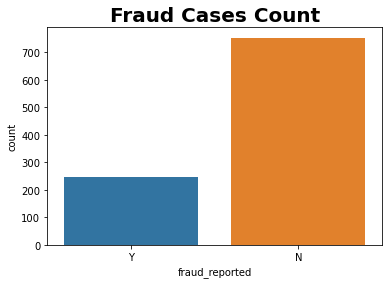

In [143]:
sns.countplot('fraud_reported',data=claim)
plt.title('Fraud Cases Count',fontsize=20,fontweight ='bold')
plt.show()

Approx 75% claims are real.

Approx 25% claim are fraud

The nature of dataset is imbalanced

## Bivariate Analysis

### months_as_customer Vs fraud_reported

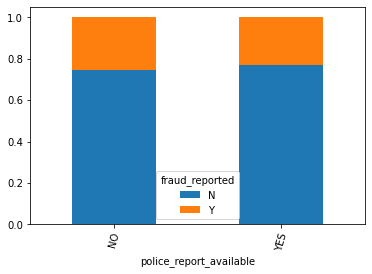

In [144]:
ct = pd.crosstab(claim.police_report_available, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### There are many cases where police report is not avaiable and it increase the chances of fraud.


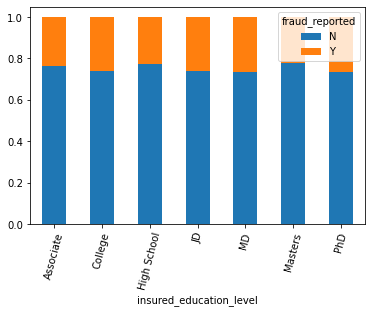

In [145]:
ct = pd.crosstab(claim.insured_education_level, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### There is not much relation between education level and person doing fraud.

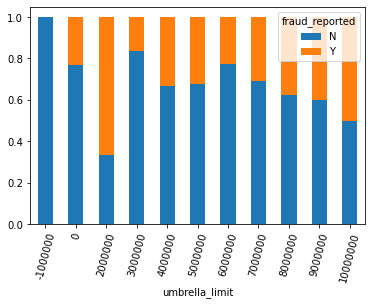

In [146]:
ct = pd.crosstab(claim.umbrella_limit , claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### Having umbrella unit of 2000000 increases the chance of Insurance fraud.

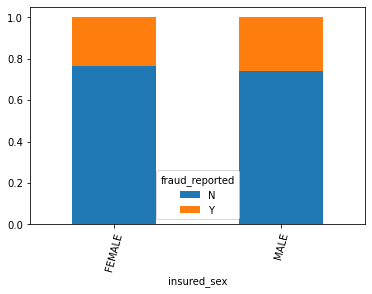

In [147]:
ct = pd.crosstab(claim.insured_sex, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### Sex has no relation with the Fraud.

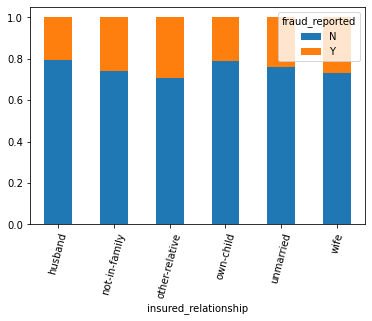

In [148]:
ct = pd.crosstab(claim.insured_relationship, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### Insured relation ship 'other-relative' has higher chance of fraud

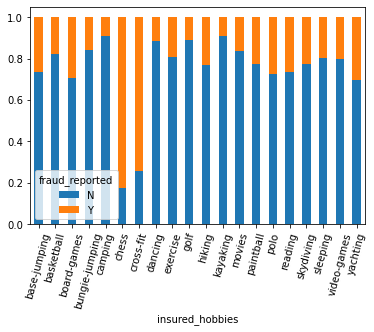

In [149]:
ct = pd.crosstab(claim.insured_hobbies, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### People who has Chess and crossfit as hobbies are most likely that their claim is fraud.

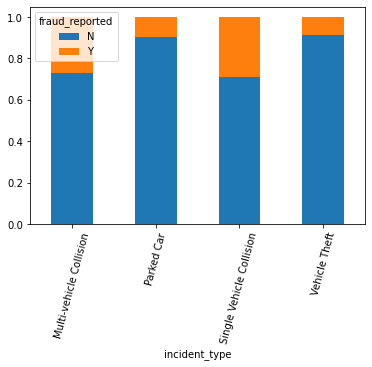

In [150]:
ct = pd.crosstab(claim.incident_type, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### Incident type of Parked car and vehicle theft has less chance that the claim is fraud.

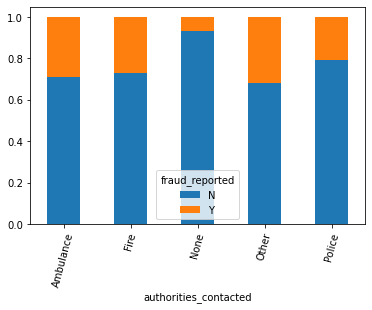

In [151]:
ct = pd.crosstab(claim.authorities_contacted, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### Chances of Fraud claim is less if None of the authorities are contacted. It increase if 'Other' is the category of authorities.

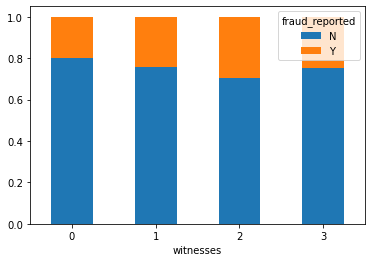

In [152]:
ct = pd.crosstab(claim.witnesses, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

###### Fraud claim is likely if having 2 witnesses.

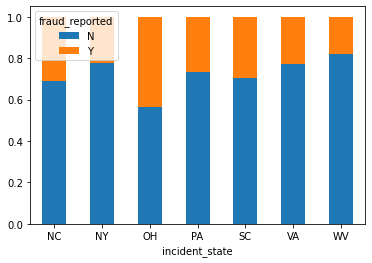

In [153]:
ct = pd.crosstab(claim.incident_state, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

###### NY and WV have least chance that the claim is fraud.

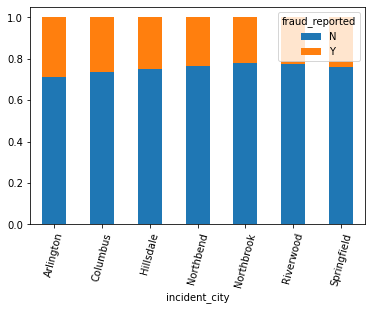

In [154]:
ct = pd.crosstab(claim.incident_city, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### Chances of fraud claim is likely in city of Arlington and Columbus

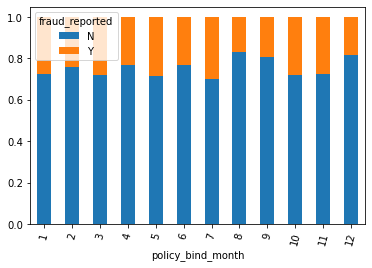

In [155]:
ct = pd.crosstab(claim.policy_bind_month, claim.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

###### No such strong relation between months and fraud claim. However Dec months is more likely to have less fraud claims.

# Explore relationship between different Features

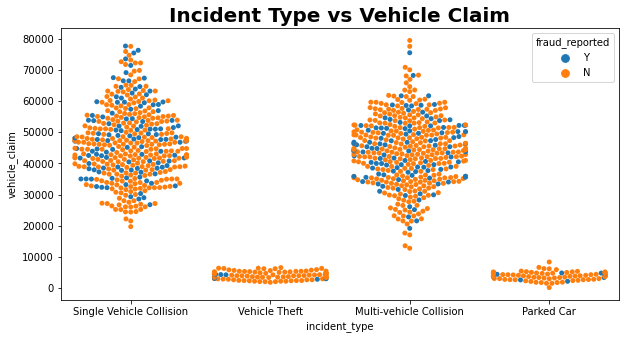

In [156]:
plt.figure(figsize=(10,5))
sns.swarmplot(claim['incident_type'], claim['vehicle_claim'] ,hue=claim["fraud_reported"])
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.show()

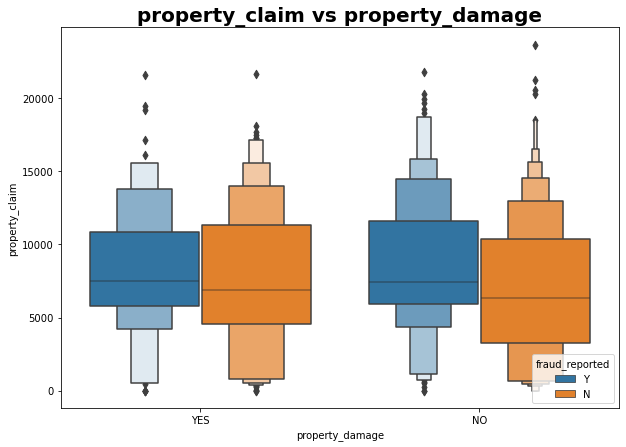

In [157]:
plt.figure(figsize=(10,7))
sns.boxenplot (claim['property_damage'],claim['property_claim'],hue=claim["fraud_reported"])
plt.title('property_claim vs property_damage',fontsize=20,fontweight ='bold')
plt.show()

As earlier, maximum fraud comes from single and multi vehicle collision

No specific relation is shown from above boxen plot of property_claim vs property_damage.

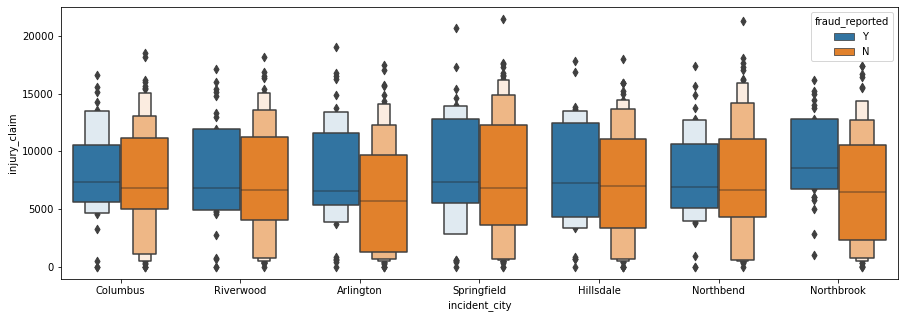

In [158]:
plt.figure(figsize=(15,5))
sns. boxenplot( claim['incident_city'], claim['injury_claim'], hue=claim["fraud_reported"])
plt.show()

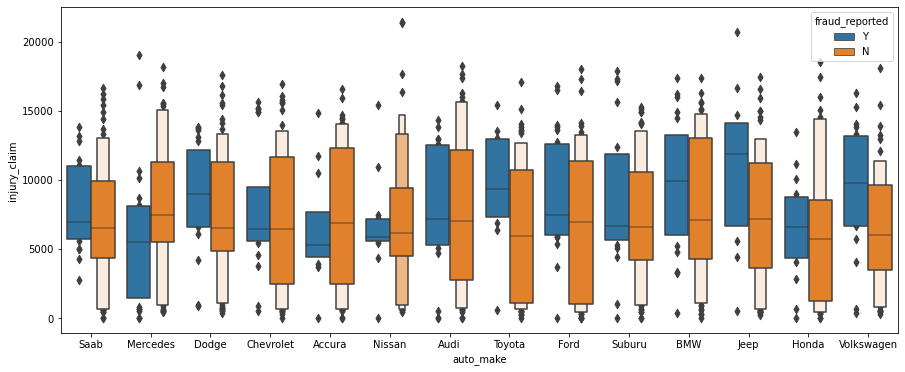

In [159]:
plt.figure(figsize=(15,6))
sns.boxenplot( claim['auto_make'], claim['injury_claim'],hue=claim["fraud_reported"])
plt.show()

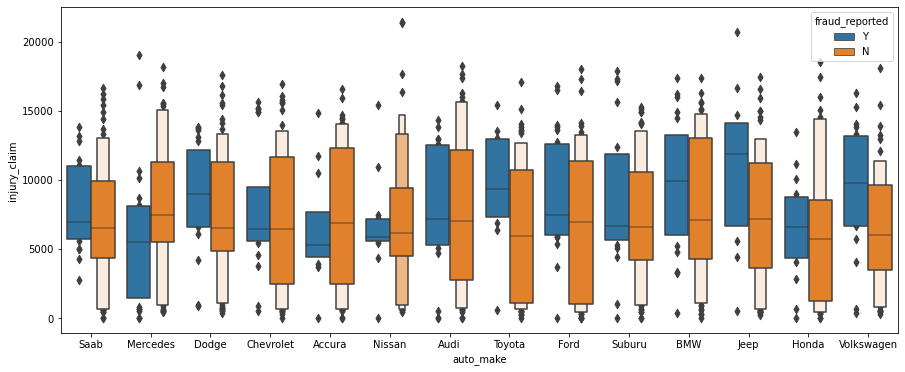

In [160]:
plt.figure(figsize=(15,6))
sns.boxenplot( claim['auto_make'], claim['injury_claim'],hue=claim["fraud_reported"])
plt.show()

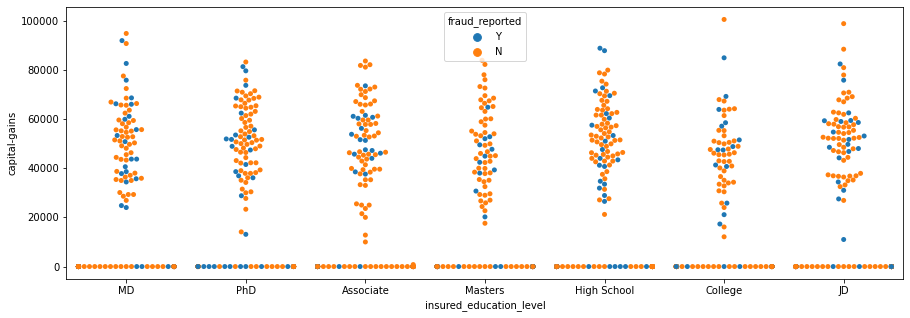

In [161]:
plt.figure(figsize=(15,5))
sns.swarmplot( claim['insured_education_level'], claim['capital-gains'],hue=claim["fraud_reported"])
plt.show()

1-Maximum injury claim is reported for Northbrook state which is fraud.
2-Maximum fraud injury_claim is for auto type Jeep.
3-For capital-gains 0 and education level PhD, fraud is maximum.

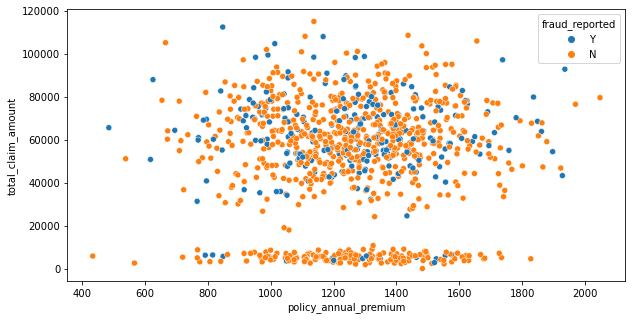

In [162]:
plt.figure(figsize=(10,5))
sns.scatterplot( claim['policy_annual_premium'], claim['total_claim_amount'], hue=claim["fraud_reported"])
plt.show()

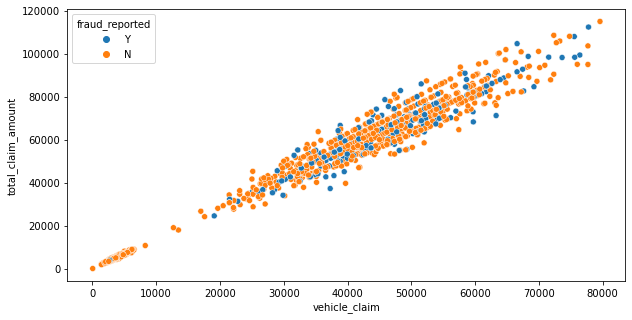

In [163]:
plt.figure(figsize=(10,5))
sns.scatterplot( claim['vehicle_claim'], claim['total_claim_amount'], hue=claim["fraud_reported"])
plt.show()

1-vehicle_claim and total_claim_amount are linearly related.
2-If total_claim_amount is 0, fraud case is very less as compared to others.

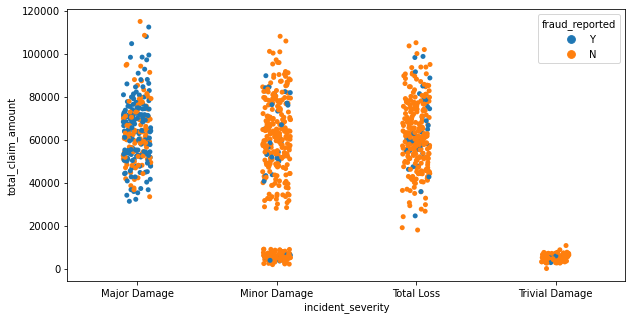

In [164]:
plt.figure(figsize=(10,5))
sns.stripplot( claim['incident_severity'], claim['total_claim_amount'], hue=claim["fraud_reported"])
plt.show()

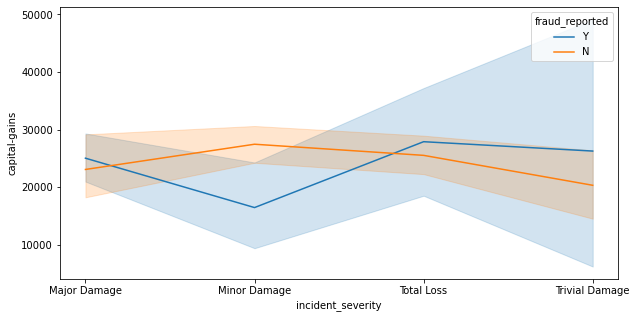

In [165]:
plt.figure(figsize=(10,5))
sns.lineplot( claim['incident_severity'], claim['capital-gains'], hue=claim["fraud_reported"])
plt.show()

###### Maximum fraud reported as major damage and total_claim_amount is also high.

# Pair Plot

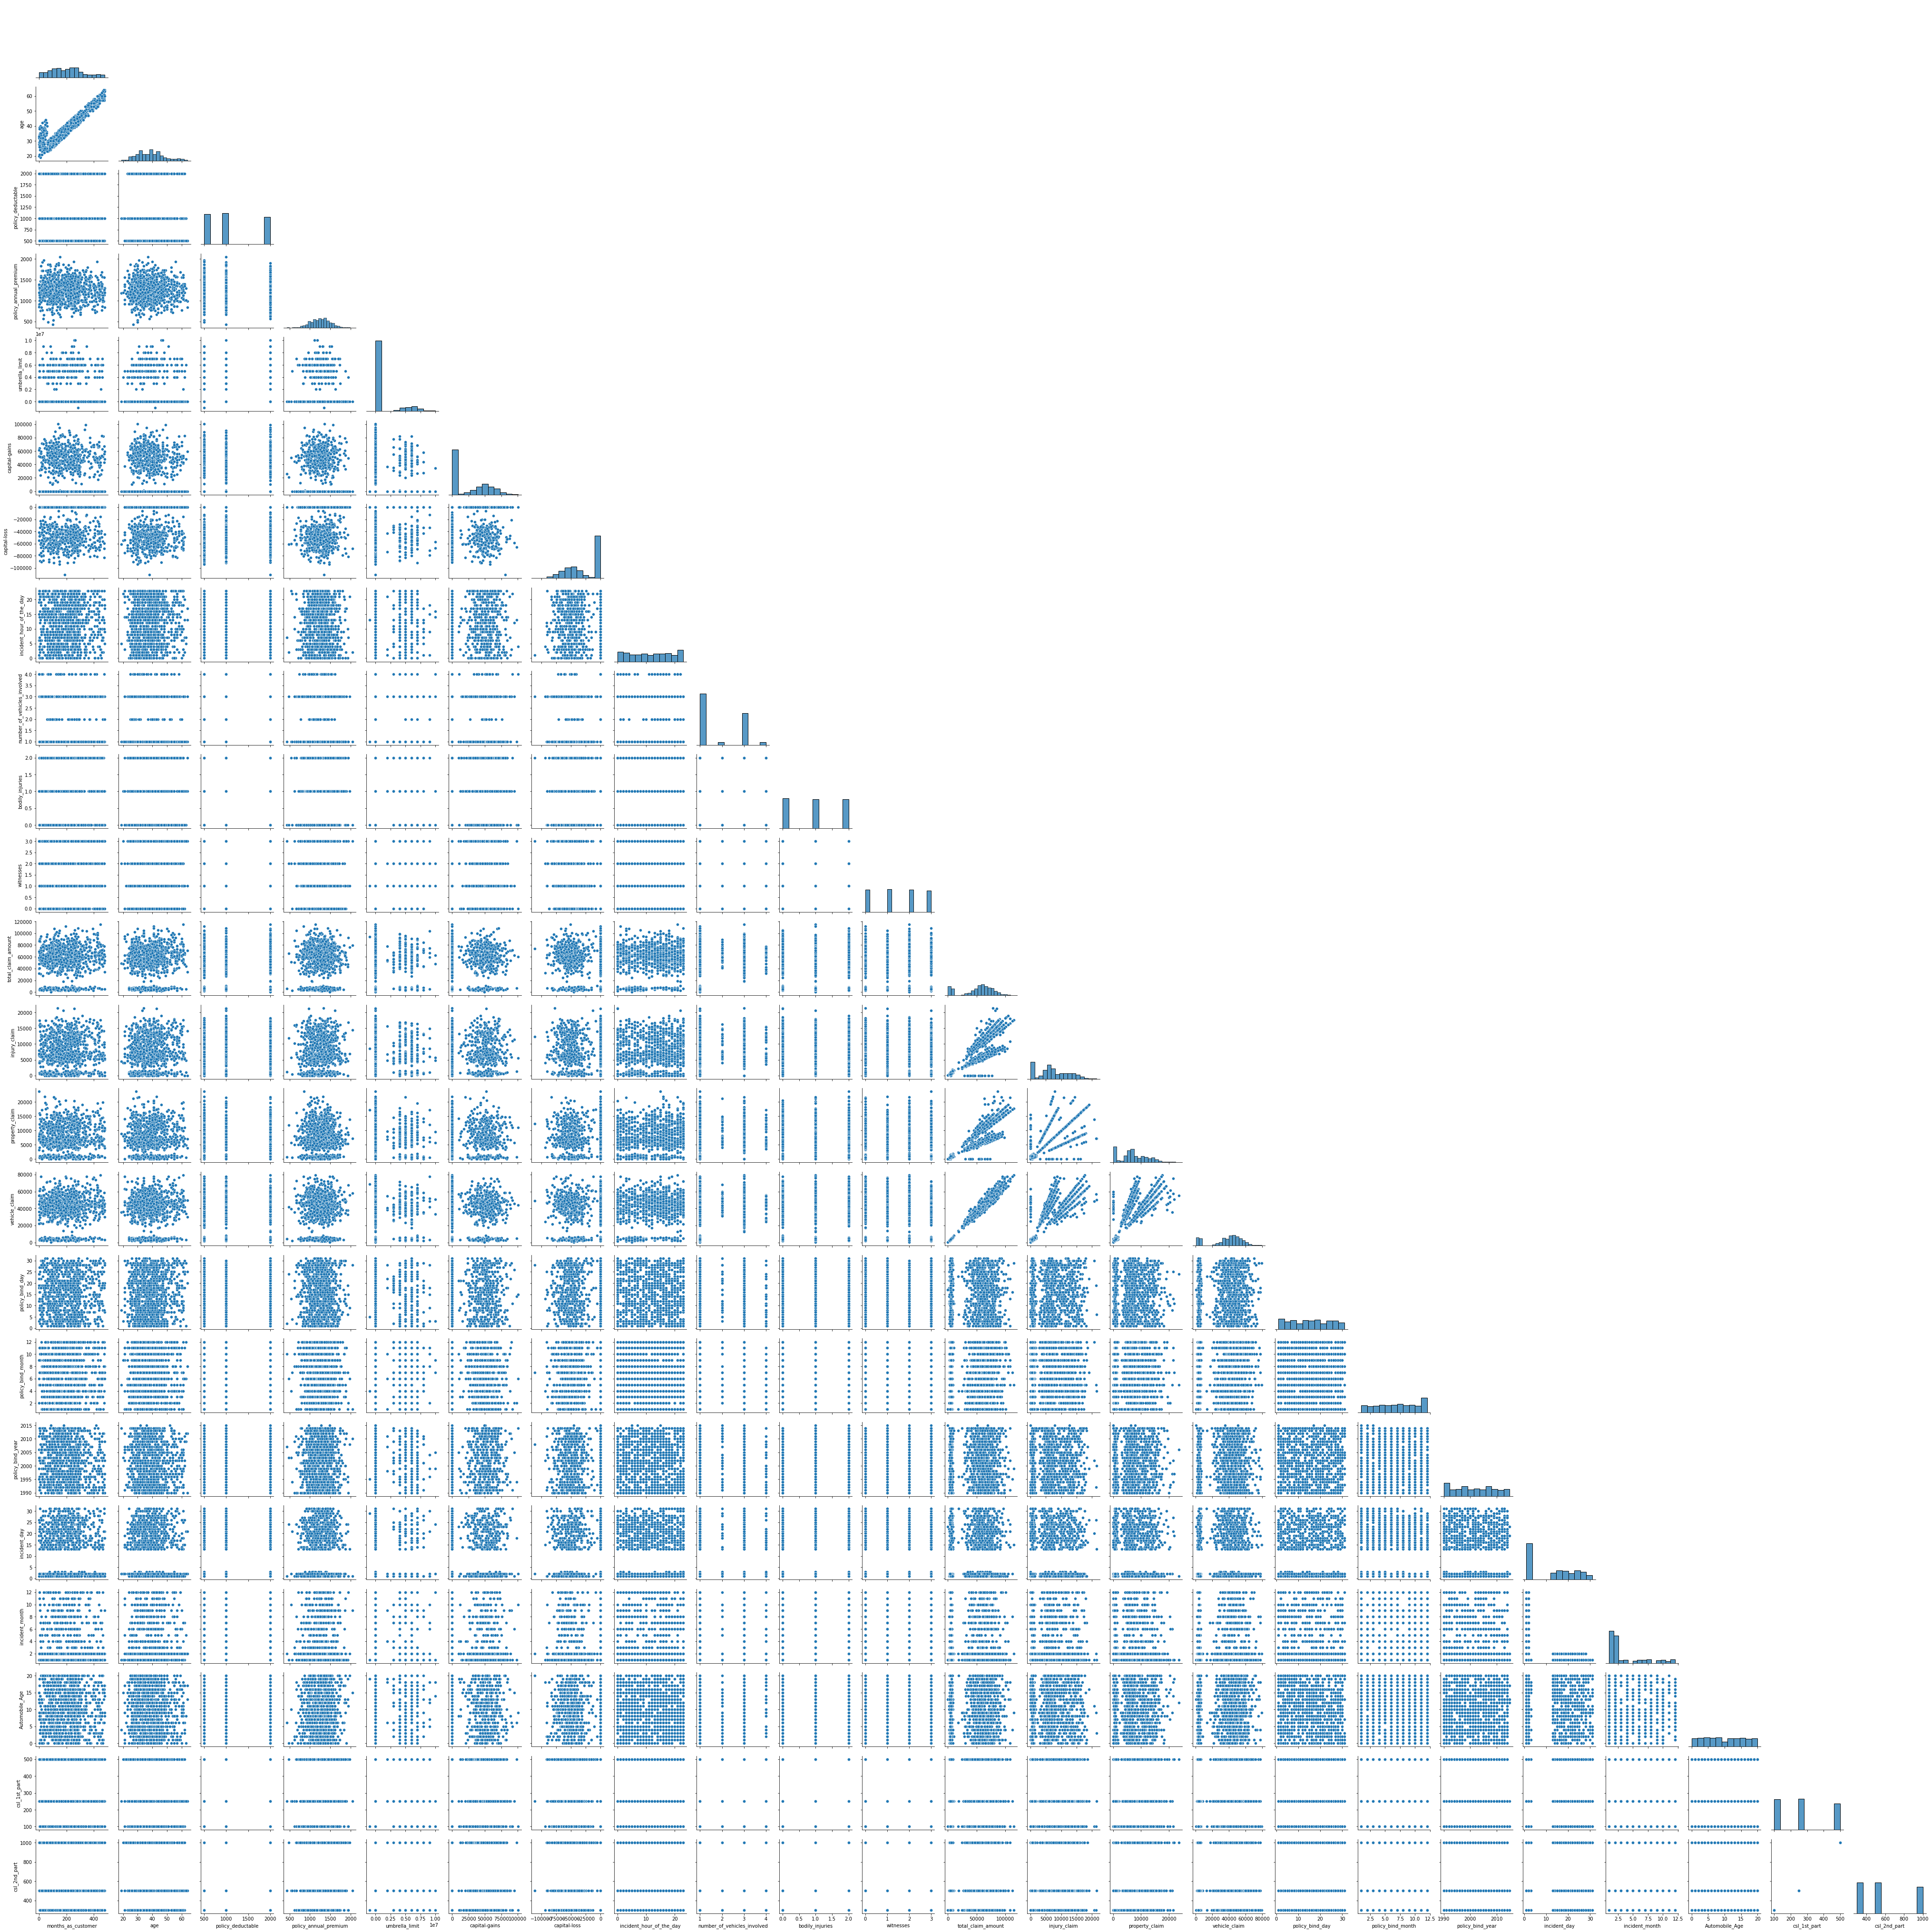

In [166]:
sns.pairplot(claim, kind='scatter', corner=True)

# Encoding categorical data

In [167]:
claim[['csl_1st_part', 'csl_2nd_part']]= claim[['csl_1st_part', 'csl_2nd_part']].astype(str)

In [168]:
cat_data = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'csl_1st_part', 'csl_2nd_part']

In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
    claim[i] = le.fit_transform(claim[i])
claim.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3                        6                   1                2  ...   
4                        0                  11                2  ...   

   auto_model  fraud_reported  policy_bind_day  policy_bind_month  \
0           1               1               17                 10   
1          12               1               27                  6   
2          30               0                9                  6   
3          34               1               25                  5   
4          31               0                6                  6   

   policy_bind_year  incident_day  incident_month  Automobile_Age  \
0              2014            25               1              11   
1              2006            21               1               8   
2              2000            22               2               8   
3              1990             1              10               1   
4              2014            17               2               6   

   csl_1st_part  csl_2nd_part  
0             1             2  
1             1             2  
2             0             1  
3             1             2  
4             2             0  

[5 rows x 40 columns]

In [170]:
num_data = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

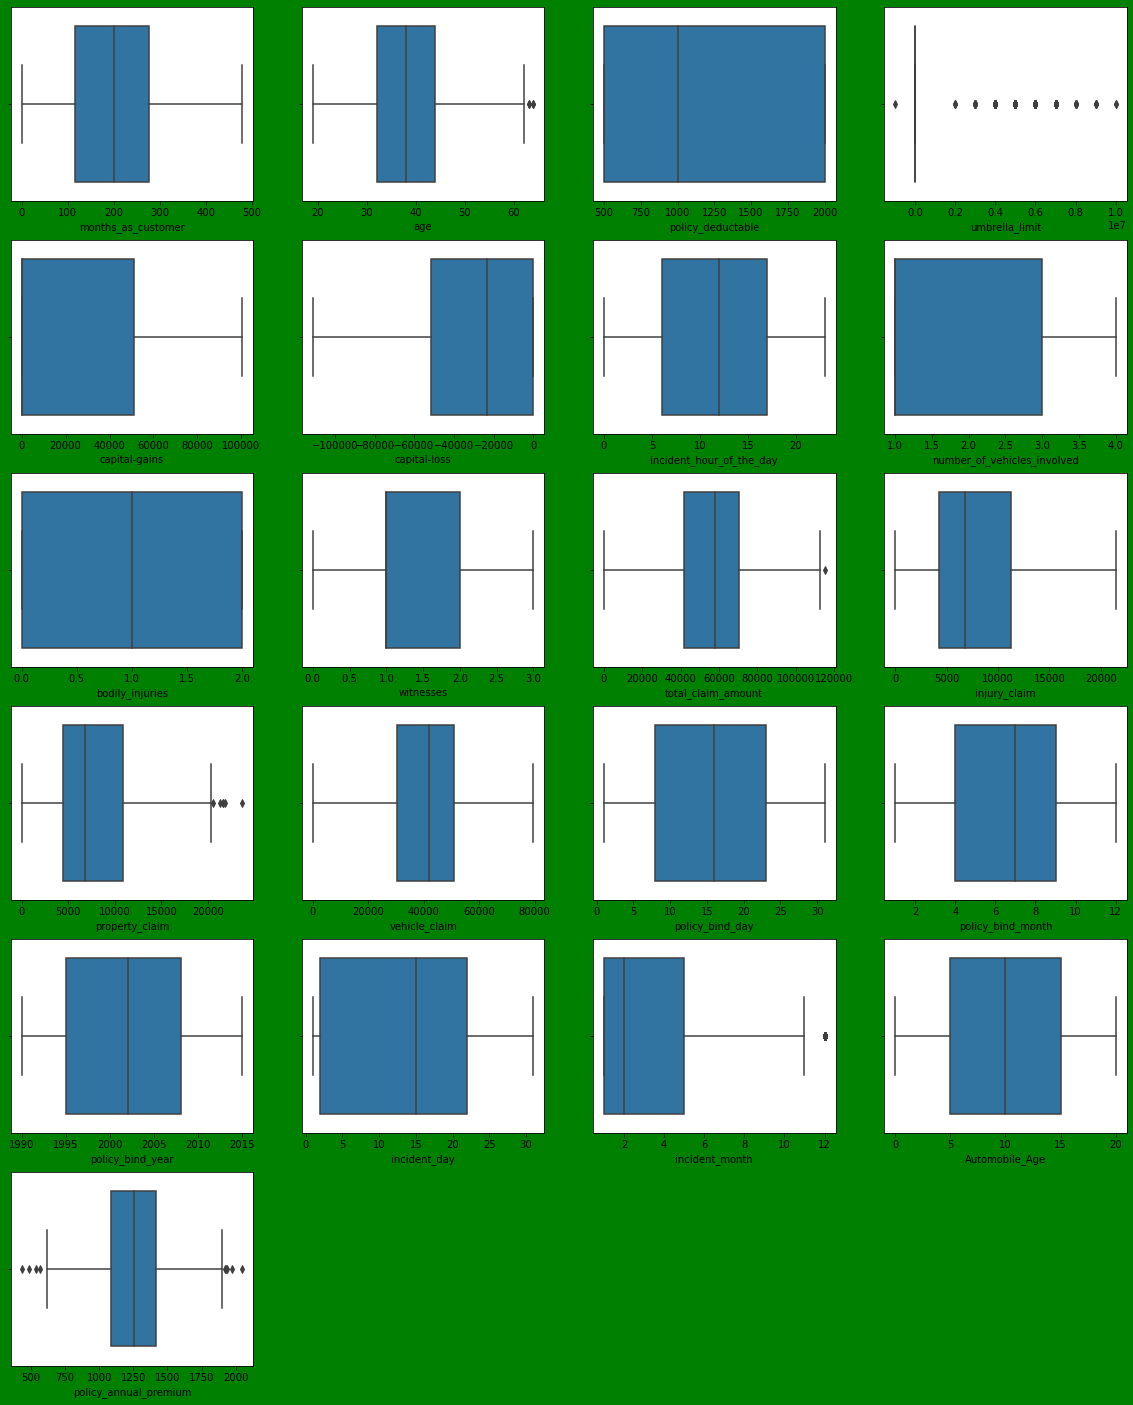

In [171]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1
for x in num_data:
    if plotnumber<=21:
        plt.subplot(6,4,plotnumber)
        sns.boxplot(claim[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

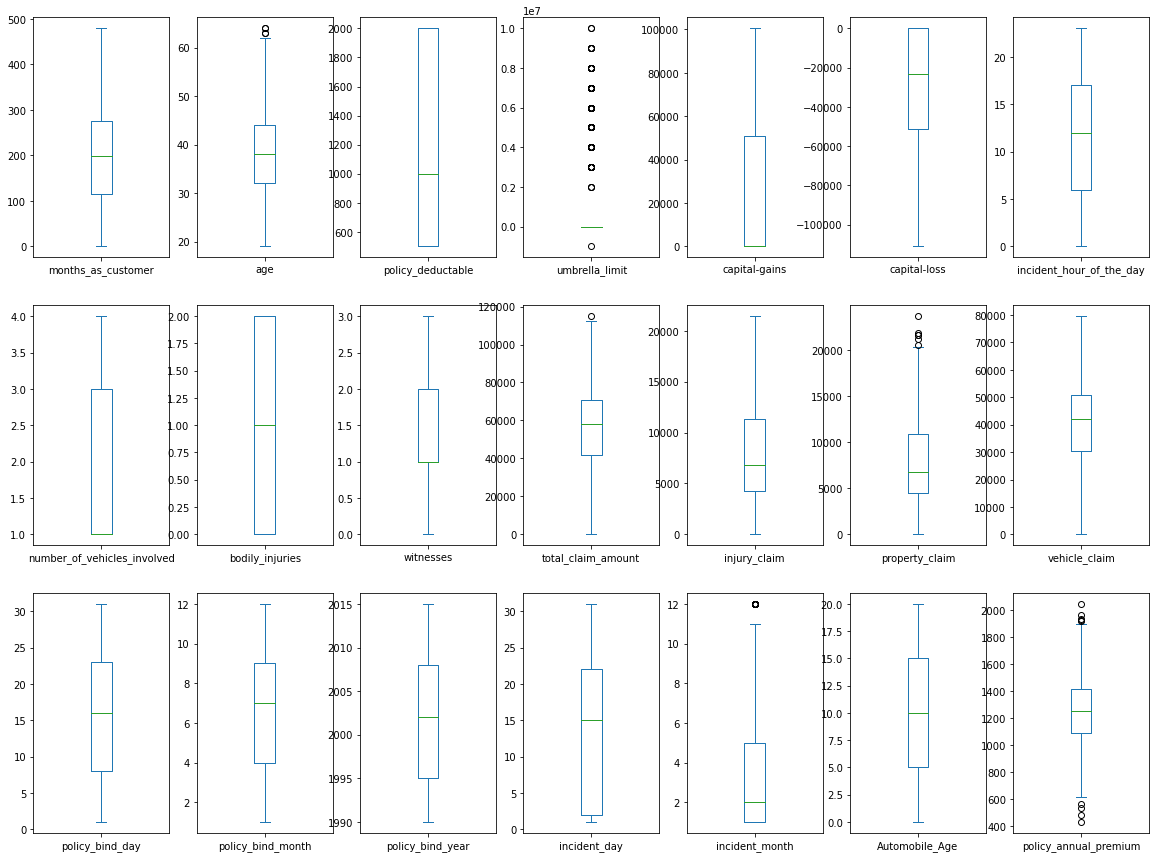

In [172]:
claim[num_data].plot(kind ='box', subplots =True , layout =(3,7), figsize = (20,15))
plt.show()

From the previous Boxplot , it is seen that there are some outiers in numarical featues columns. Let's remove it.

# Outliers removal by Z score

Let's take the Z Score =3

Any data with Z Score>3, should to be rejected

In [173]:
df= claim.copy()

In [174]:
from scipy.stats import zscore
z = np.abs(zscore(claim))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 27,  5,  5,  5,  4, 12,
        5,  5,  5], dtype=int64))


In [175]:
claim1 = claim[(z<3).all(axis = 1)]
claim1.shape

(980, 40)

In [176]:
print ("Percentage of data loss",((claim.shape[0]- claim1.shape[0])/claim.shape[0])*100, "%")

Percentage of data loss 2.0 %


Outliers are removed.

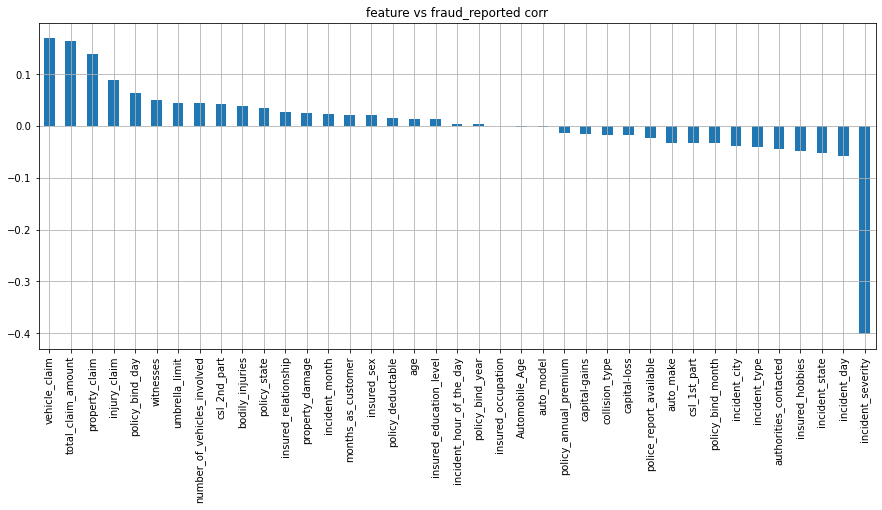

In [177]:
claim1.drop("fraud_reported", axis=1).corrwith(claim1["fraud_reported"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature vs fraud_reported corr')
plt.show()

# Skewness

In [178]:
claim1.skew().sort_values()

vehicle_claim                 -0.620936
total_claim_amount            -0.593593
capital-loss                  -0.376884
incident_state                -0.149255
authorities_contacted         -0.114044
csl_2nd_part                  -0.094370
auto_model                    -0.073462
insured_hobbies               -0.061488
insured_occupation            -0.055360
incident_hour_of_the_day      -0.039280
policy_state                  -0.038157
collision_type                -0.032778
auto_make                     -0.028739
policy_bind_month             -0.024643
bodily_injuries                0.003757
insured_education_level        0.006286
witnesses                      0.026211
policy_bind_day                0.028152
policy_annual_premium          0.035964
incident_city                  0.043882
Automobile_Age                 0.054522
incident_day                   0.055443
policy_bind_year               0.065022
insured_relationship           0.078339
incident_type                  0.090563


In [179]:
skew_data =['total_claim_amount','vehicle_claim']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

claim1[skew_data] = scaler.fit_transform(claim1[skew_data].values)
claim1[skew_data].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

# Data Balancing (SMOTE)

In [180]:
df2= claim1.copy()

In [181]:
claim1['fraud_reported'].value_counts() 

0    740
1    240
Name: fraud_reported, dtype: int64

In [182]:
from imblearn.over_sampling import SMOTE
over = SMOTE()

# splitting data in target and dependent feature
x = claim1.drop(['fraud_reported'], axis =1)
y = claim1['fraud_reported']
x,y = over.fit_resample(x,y)
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

# Checking Multicollinearity

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

VIF                     Features
0      33.080208           months_as_customer
1     152.828774                          age
2       2.496397                 policy_state
3       5.187524            policy_deductable
4      32.650080        policy_annual_premium
5       1.320919               umbrella_limit
6       1.774468                  insured_sex
7       3.448879      insured_education_level
8       4.171693           insured_occupation
9       4.333221              insured_hobbies
10      3.401869         insured_relationship
11      1.935996                capital-gains
12      2.046375                 capital-loss
13      7.413838                incident_type
14      2.909895               collision_type
15      2.534253            incident_severity
16      3.101601        authorities_contacted
17      3.461573               incident_state
18      3.245549                incident_city
19      4.562349     incident_hour_of_the_day
20     15.813342  number_of_vehicles_involved
21      1.371000              property_damage
22      2.496198              bodily_injuries
23      2.960474                    witnesses
24      1.444233      police_report_available
25  35787.203033           total_claim_amount
26   5380.522896                 injury_claim
27   5440.380769               property_claim
28  17800.020522                vehicle_claim
29      4.107114                    auto_make
30      4.765846                   auto_model
31      4.659535              policy_bind_day
32      5.318673            policy_bind_month
33  14831.605096             policy_bind_year
34      4.681481                 incident_day
35      3.910012               incident_month
36      4.087625               Automobile_Age
37      2.601180                 csl_1st_part
38      3.051462                 csl_2nd_part

###### Multicollinearity present between different features

# Principal Component Analysis (PCA)

In [184]:
x1= x.copy()

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

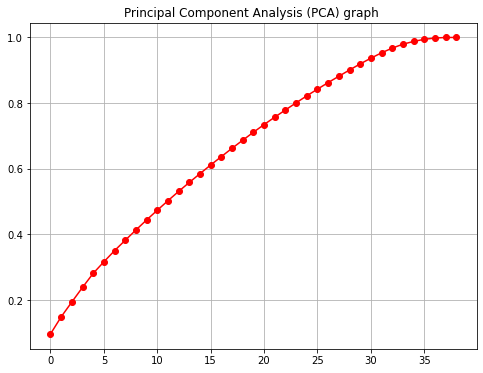

In [186]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()

###### Here , above 90% variance gives the first 30 component. Let's take the first 30 components

In [187]:
pca_new = PCA(n_components=30)
x_scale_new = pca_new.fit_transform(x_scale)
prin_x=pd.DataFrame(x_scale_new )
pd.DataFrame(x_scale_new).head()

0         1         2         3         4         5         6   \
0  0.197360  1.330277  2.298962  3.199192 -0.809017 -1.718812 -1.582632   
1 -4.318957  0.833395 -0.196607  0.379473 -1.293009 -1.092077  0.655680   
2 -1.112669 -1.281316  0.731711 -1.524394  0.407803  0.279925  2.223660   
3  0.250759  1.526317 -3.104850 -1.351703  0.483474  0.219133  3.435423   
4 -3.482746  1.180753 -0.984656 -1.021933 -0.976210  2.334112  1.927204   

         7         8         9   ...        20        21        22        23  \
0 -1.027303 -0.508527 -0.196304  ... -1.561766 -0.187723  1.333031  0.898089   
1 -0.599446 -0.260207 -0.383334  ... -0.112668 -0.226216  1.695151 -0.104253   
2  0.440343  0.481526 -1.919531  ... -1.110589 -1.617699  0.675364 -1.594054   
3 -2.057110  0.691929 -0.424690  ... -1.012036 -1.261249  1.110772  0.580031   
4  2.739056  0.535530  1.358681  ...  0.955225  0.886420  1.114297  0.737187   

         24        25        26        27        28        29  
0  1.201309 -1.407210 -0.451142  1.474192  0.943542 -0.462705  
1  0.988011  1.602283  0.132663  0.043692 -0.177199 -1.030133  
2  0.733740  0.659005  0.309434  0.420353 -1.123547  0.216391  
3 -0.449383 -1.911154  0.058778 -0.932424 -0.418710  0.140684  
4 -0.356160 -0.229154 -2.031063 -0.600065  1.307693 -0.057011  

[5 rows x 30 columns]

# Final predictions using different Classification ML Models

### Find best Random state

In [188]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(500, 2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.8297297297297297 on Random_state 1620


In [189]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (1110, 30)
Training target shape: (1110,)
Test feature shape: (370, 30)
Test target shape: (370,)


# Using LogisticRegression()

In [190]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state= 1620)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.8297297297297297
cof_mat:
  [[153  38]
 [ 25 154]]
classification report:
                precision    recall  f1-score   support

           0       0.86      0.80      0.83       191
           1       0.80      0.86      0.83       179

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370

-----------
-----------
training score :  0.7675675675675676
testing score :  0.8297297297297297


## Use GridSearchCV for hyperparameter tuning

In [191]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1','elasticnet', 'none'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [192]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.8351351351351352
cof_mat:

  [[154  37]
 [ 24 155]]
classification report:
                precision    recall  f1-score   support

           0       0.87      0.81      0.83       191
           1       0.81      0.87      0.84       179

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370

-----------
-----------
training score :  0.7666666666666667
testing score :  0.8351351351351352


###### Accuracy score is slightly improved after using gridsearchCV 

# Using DecisionTreeClassifier()

In [193]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.754054054054054


cof_mat:  [[135  56]
 [ 35 144]]


classification report: 

               precision    recall  f1-score   support

           0       0.79      0.71      0.75       191
           1       0.72      0.80      0.76       179

    accuracy                           0.75       370
   macro avg       0.76      0.76      0.75       370
weighted avg       0.76      0.75      0.75       370

-----------
-----------
training score :  1.0
testing score :  0.754054054054054


## Use GridSearchCV for hyperparameter tuning

In [194]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 3, 'splitter': 'best'}


In [195]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.6945945945945946


cof_mat:  [[125  66]
 [ 47 132]]


classification report: 

               precision    recall  f1-score   support

           0       0.73      0.65      0.69       191
           1       0.67      0.74      0.70       179

    accuracy                           0.69       370
   macro avg       0.70      0.70      0.69       370
weighted avg       0.70      0.69      0.69       370

-----------
-----------
training score :  0.9945945945945946
testing score :  0.6945945945945946


Accuracy score is slightly improved after using GridSearchCV with DecisionTreeClassifier().

But the difference between training score, testing score is decreased.

## Using GradientBoostingClassifier()

In [196]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.8324324324324325


cof_mat:  [[153  38]
 [ 24 155]]


classification report: 

               precision    recall  f1-score   support

           0       0.86      0.80      0.83       191
           1       0.80      0.87      0.83       179

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370

-----------
-----------
training score :  0.9603603603603603
testing score :  0.8324324324324325


## Using Gridsearch CV

In [197]:
param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01,1.0,0.001], 'loss': ['log_loss', 'deviance', 'exponential'],
        "min_samples_leaf" :[1,2,3], "criterion":['friedman_mse', 'squared_error','mse'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'squared_error', 'learning_rate': 1.0, 'loss': 'exponential', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [198]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.8378378378378378


cof_mat:  [[155  36]
 [ 24 155]]


classification report:

                precision    recall  f1-score   support

           0       0.87      0.81      0.84       191
           1       0.81      0.87      0.84       179

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370

-----------
-----------
training score :  1.0
testing score :  0.8378378378378378


###### Accuracy score, training score, testing score are not improved after using GridSearchCV with GradientBoostingClassifier()

## Using RandomForestClassifier()

In [199]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.8864864864864865


cof_mat:  [[170  21]
 [ 21 158]]


classification report:                precision    recall  f1-score   support

           0       0.89      0.89      0.89       191
           1       0.88      0.88      0.88       179

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

-----------
-----------
training score :  1.0
testing score :  0.8864864864864865


## Use GridSearchCV for hyperparameter tuning:

In [200]:
params = {'n_estimators' : [100,80, 140], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy", "log_loss"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 140}


In [202]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))


accu score :  0.8810810810810811


cof_mat:  [[170  21]
 [ 23 156]]


classification report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       191
           1       0.88      0.87      0.88       179

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370

-----------
-----------
training score :  1.0
testing score :  0.8810810810810811


###### Accuracy score is not improved after using GridSearchCV with RandomForestClassifier()

# ExtraTreesClassifier()

In [203]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.8945945945945946


cof_mat:  [[171  20]
 [ 19 160]]


classification report:                precision    recall  f1-score   support

           0       0.90      0.90      0.90       191
           1       0.89      0.89      0.89       179

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

-----------
-----------
training score :  1.0
testing score :  0.8945945945945946


# Use GridSearchCV for hyperparameter tuning

In [204]:
params = {'n_estimators' : [100,80, 120], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 100}


In [206]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8648648648648649


cof_mat:  [[163  28]
 [ 22 157]]


classification report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       191
           1       0.85      0.88      0.86       179

    accuracy                           0.86       370
   macro avg       0.86      0.87      0.86       370
weighted avg       0.87      0.86      0.86       370

-----------
-----------
training score :  1.0
testing score :  0.8648648648648649


###### Accuracy score is slightly improved after using GridSearchCV with ExtraTreesClassifier()

# Using AdaBoostClassifier

In [205]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.8189189189189189


cof_mat:  [[151  40]
 [ 27 152]]


classification report:                precision    recall  f1-score   support

           0       0.85      0.79      0.82       191
           1       0.79      0.85      0.82       179

    accuracy                           0.82       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.82      0.82      0.82       370

-----------
-----------
training score :  0.8378378378378378
testing score :  0.8189189189189189


## Using GridSearchCV for hyperparameter tuning:

In [207]:
params = {'n_estimators' : [50,40, 60, 45], 'learning_rate': [1,0.1,0.01, 0.001] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'n_estimators': 45}


In [208]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.8162162162162162


cof_mat:  [[149  42]
 [ 26 153]]


classification report: 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       191
           1       0.78      0.85      0.82       179

    accuracy                           0.82       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.82      0.82      0.82       370

-----------
-----------
training score :  0.8351351351351352
testing score :  0.8162162162162162


###### Accuracy score is not improved after using GridSearchCV with AdaBoostClassifier()

# Using SVC('rbf')

In [212]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [213]:
svmkernel('rbf')

accu score :  0.8513513513513513


cof_mat:  [[155  36]
 [ 19 160]]


classification report: 

               precision    recall  f1-score   support

           0       0.89      0.81      0.85       191
           1       0.82      0.89      0.85       179

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370

-----------
-----------
training score :  0.9333333333333333
testing score :  0.8513513513513513


## Using SVC ('linear')

In [215]:
svmkernel('linear')

accu score :  0.8297297297297297


cof_mat:  [[153  38]
 [ 25 154]]


classification report: 

               precision    recall  f1-score   support

           0       0.86      0.80      0.83       191
           1       0.80      0.86      0.83       179

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370

-----------
-----------
training score :  0.772972972972973
testing score :  0.8297297297297297


## Using SVC ('poly')

In [217]:
svmkernel('poly')

accu score :  0.7648648648648648


cof_mat:  [[115  76]
 [ 11 168]]


classification report: 

               precision    recall  f1-score   support

           0       0.91      0.60      0.73       191
           1       0.69      0.94      0.79       179

    accuracy                           0.76       370
   macro avg       0.80      0.77      0.76       370
weighted avg       0.80      0.76      0.76       370

-----------
-----------
training score :  0.8900900900900901
testing score :  0.7648648648648648


###### SVC('rbf') is better than two others. let's take it for further process

###### Here, Extratreeclassifier() gives the best accuracy score. Let's check cv with the hyper tunned model of respective ML model.

# Cross Validtion

In [218]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])

all_models = [grid_log_best, grid_clf_best, gbdt, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale_new,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

 Cross Validation Score :  [0.60377358 0.61320755 0.80660377 0.81990521 0.86255924 0.84834123
 0.84834123]

Mean CV Score : 0.771818832155951

Std deviation : 0.10478836794633638

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='auto', min_samples_split=3)

 Cross Validation Score :  [0.61320755 0.53773585 0.68396226 0.70616114 0.74407583 0.82938389
 0.7535545 ]

Mean CV Score : 0.6954401451182278

Std deviation : 0.08909317809559694

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier()

 Cross Validation Score :  [0.58962264 0.58962264 0.82075472 0.85781991 0.8436019  0.86255924
 0.8957346 ]

Mean CV Score : 0.7799593771157752

Std deviation : 0.1221589578113341

-----------
-----------
Cross Validation Score of : RandomForestClassifier(criterion='entropy', n_estimators=

##### Among 7 classification models ExtraTreesClassifier() gives good accuracy and maximum f1 score along with a good Cross-validation score.

# Let's plot AUC-ROC Curve

Plotting ROC AUC Curve to choose best mode

In [219]:
grid_log_best.fit(x_train, y_train)
grid_clf_best.fit(x_train, y_train)
gbdt.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_etc_best.fit(x_train, y_train)
grid_ada_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [220]:
grid_log_best.fit(x_test, y_test)
grid_clf_best.fit(x_test, y_test)
gbdt.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_etc_best.fit(x_test, y_test)
grid_ada_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


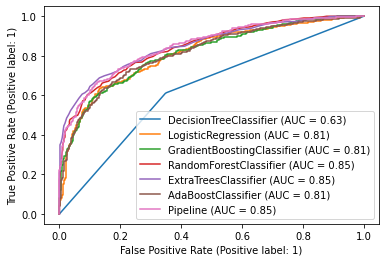

In [221]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_train, y_train)

plot_roc_curve(grid_log_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(gbdt, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.show()

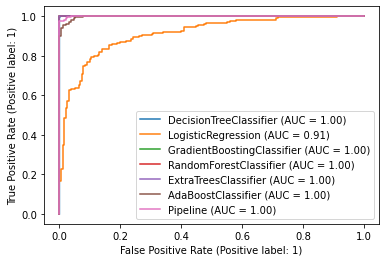

In [222]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_test, y_test)

plot_roc_curve(grid_log_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbdt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.show()

###### Here ExtraTreesClassifier gives best AUC score for training and testing dataset. So it is the final model for this dataset.

In [223]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8756756756756757


cof_mat:  [[166  25]
 [ 21 158]]


classification report: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       191
           1       0.86      0.88      0.87       179

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370

-----------
-----------
training score :  1.0
testing score :  0.8756756756756757


# Confusion Matrix

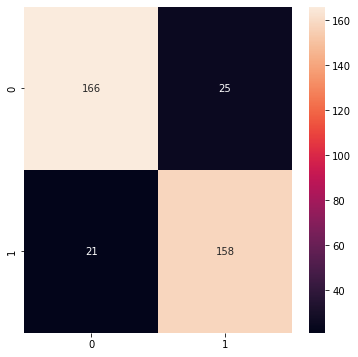

In [224]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

# Load the model

In [225]:
import pickle
pickle.dump(grid_etc_best, open("Insurance_Fraud_Classification_model", "wb"))
load_Insurance_Fraud_Classification_model= pickle.load(open("Insurance_Fraud_Classification_model", "rb"))

In [227]:
y_pred = load_Insurance_Fraud_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=10)

Predicted Values  Actual Values
131                 1              1
101                 0              0
313                 0              0
175                 1              1
4                   0              0
293                 1              1
359                 1              1
190                 0              0
58                  1              1
33                  1              1

###### Great, Our model predicted 100 percent correct values

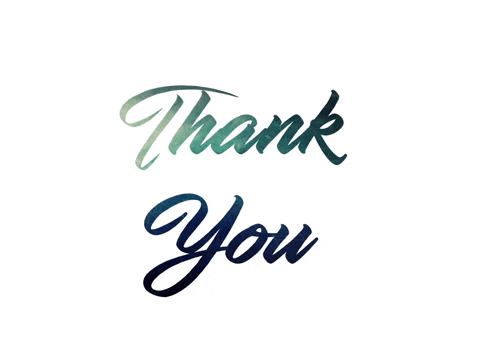